In [1]:
import mne
import h5py
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import os
from tools import * # stuff from this project
from ridge import * # ridge pkg
from utils import * # utils from ridge

/Users/maansidesai/anaconda3/envs/mne/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/maansidesai/anaconda3/envs/mne/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
subject_list = ['MT0001', 'MT0002', 'MT0004', 'MT0008',
                'MT0010','MT0011', 'MT0013','MT0014']
# MT0003, MT0005, MT0006, MT0009, MT0012, MT0015, MT0016, MT0017
# breaks because they didnt hear the last sentence

## Load data

In [4]:
user = 'maansi'
if user == 'maansi':
    data_dir = '/Users/maansidesai/Box/hamilton_lab_data/trailers_timit' #change this path
elif user == 'garret':
    data_dir = '/home/kfsh/data/trailers_timit'

stimulus_class = 'TIMIT'

resp_dict = dict() # stim is the same across subjects
for subject in subject_list:
    print(subject)
    #load stim and resp 
    resp_dict[subject], stim_dict = loadEEGh5(subject, stimulus_class, data_dir,
              eeg_epochs=True, resp_mean = True, binarymat=False, binaryfeatmat = True, envelope=False, pitch=False, gabor_pc10=False, 
              spectrogram=False, binned_pitches=False, spectrogram_scaled=False, scene_cut=False)

MT0001
TIMIT
['fadg0_si1279.wav', 'faem0_si2022.wav', 'falr0_si1955.wav', 'fbcg1_si1612.wav', 'fbjl0_si2182.wav', 'fbmh0_si1766.wav', 'fbmj0_si815.wav', 'fcag0_si1503.wav', 'fcag0_si1641.wav', 'fcaj0_si1479.wav', 'fcaj0_si1804.wav', 'fceg0_si1878.wav', 'fceg0_si618.wav', 'fcft0_si1808.wav', 'fcft0_si548.wav', 'fcjs0_si1607.wav', 'fcmh0_si2084.wav', 'fcmh1_si1493.wav', 'fcmr0_si1735.wav', 'fcmr0_si475.wav', 'fcrh0_si1718.wav', 'fcrz0_si2053.wav', 'fdas1_si2091.wav', 'fdaw0_si1406.wav', 'fdfb0_si1948.wav', 'fdhc0_si2189.wav', 'fdjh0_si1565.wav', 'fdml0_si2075.wav', 'fdms0_si1218.wav', 'fdrd1_si1544.wav', 'fdrw0_si1423.wav', 'fdxw0_si1511.wav', 'fdxw0_si2141.wav', 'feac0_si1245.wav', 'fear0_si1882.wav', 'fedw0_si1653.wav', 'fetb0_si1148.wav', 'fgcs0_si856.wav', 'fgjd0_si1179.wav', 'fgmd0_si2107.wav', 'fgrw0_si1990.wav', 'fhlm0_si1560.wav', 'fisb0_si2209.wav', 'fjas0_si2030.wav', 'fjhk0_si1652.wav', 'fjkl0_si1562.wav', 'fjkl0_si2192.wav', 'fjlg0_si1506.wav', 'fjlg0_si2306.wav', 'fjlr0_si18

phnfeatmat shape is:
(14, 324)
taking the mean across repeats
(64, 324)
fcmr0_si1735.wav
phnfeatmat shape is:
(14, 298)
taking the mean across repeats
(64, 298)
fcmr0_si475.wav
phnfeatmat shape is:
(14, 249)
taking the mean across repeats
(64, 249)
fcrh0_si1718.wav
phnfeatmat shape is:
(14, 218)
taking the mean across repeats
(64, 218)
fcrz0_si2053.wav
phnfeatmat shape is:
(14, 325)
taking the mean across repeats
(64, 325)
fdas1_si2091.wav
phnfeatmat shape is:
(14, 313)
taking the mean across repeats
(64, 313)
fdaw0_si1406.wav
phnfeatmat shape is:
(14, 327)
taking the mean across repeats
(64, 327)
fdfb0_si1948.wav
phnfeatmat shape is:
(14, 206)
taking the mean across repeats
(64, 206)
fdhc0_si2189.wav
phnfeatmat shape is:
(14, 289)
taking the mean across repeats
(64, 289)
fdjh0_si1565.wav
phnfeatmat shape is:
(14, 313)
taking the mean across repeats
(64, 313)
fdml0_si2075.wav
phnfeatmat shape is:
(14, 206)
taking the mean across repeats
(64, 206)
fdms0_si1218.wav
phnfeatmat shape is:
(

phnfeatmat shape is:
(14, 278)
taking the mean across repeats
(64, 278)
makr0_si722.wav
phnfeatmat shape is:
(14, 264)
taking the mean across repeats
(64, 264)
marc0_si1188.wav
phnfeatmat shape is:
(14, 184)
taking the mean across repeats
(64, 184)
marc0_si1818.wav
phnfeatmat shape is:
(14, 281)
taking the mean across repeats
(64, 281)
marw0_si646.wav
phnfeatmat shape is:
(14, 310)
taking the mean across repeats
(64, 310)
mbbr0_si1685.wav
phnfeatmat shape is:
(14, 325)
taking the mean across repeats
(64, 325)
mbbr0_si2315.wav
phnfeatmat shape is:
(14, 248)
taking the mean across repeats
(64, 248)
mbjk0_si545.wav
phnfeatmat shape is:
(14, 259)
taking the mean across repeats
(64, 259)
mbjv0_si1877.wav
phnfeatmat shape is:
(14, 291)
taking the mean across repeats
(64, 291)
mbma0_si1852.wav
phnfeatmat shape is:
(14, 217)
taking the mean across repeats
(64, 217)
mbma0_si592.wav
phnfeatmat shape is:
(14, 191)
taking the mean across repeats
(64, 191)
mbml0_si1169.wav
phnfeatmat shape is:
(14,

phnfeatmat shape is:
(14, 222)
taking the mean across repeats
(64, 222)
milb0_si2163.wav
phnfeatmat shape is:
(14, 318)
taking the mean across repeats
(64, 318)
mjae0_si2154.wav
phnfeatmat shape is:
(14, 296)
taking the mean across repeats
(64, 296)
mjar0_si2247.wav
phnfeatmat shape is:
(14, 175)
taking the mean across repeats
(64, 175)
mjbg0_si1724.wav
phnfeatmat shape is:
(14, 216)
taking the mean across repeats
(64, 216)
mjda0_si1661.wav
phnfeatmat shape is:
(14, 302)
taking the mean across repeats
(64, 302)
mjdc0_si1161.wav
phnfeatmat shape is:
(14, 295)
taking the mean across repeats
(64, 295)
mjdc0_si2165.wav
phnfeatmat shape is:
(14, 237)
taking the mean across repeats
(64, 237)
mjdg0_si1705.wav
phnfeatmat shape is:
(14, 288)
taking the mean across repeats
(64, 288)
mjdh0_si1984.wav
phnfeatmat shape is:
(14, 172)
taking the mean across repeats
(64, 172)
mjdm0_si1937.wav
phnfeatmat shape is:
(14, 171)
taking the mean across repeats
(64, 171)
mjdm0_si974.wav
phnfeatmat shape is:
(

phnfeatmat shape is:
(14, 273)
taking the mean across repeats
(64, 273)
mrgg0_si1199.wav
phnfeatmat shape is:
(14, 261)
taking the mean across repeats
(64, 261)
mrgg0_si569.wav
phnfeatmat shape is:
(14, 322)
taking the mean across repeats
(64, 322)
mrgs0_si1986.wav
phnfeatmat shape is:
(14, 192)
taking the mean across repeats
(64, 192)
mrjh0_si914.wav
phnfeatmat shape is:
(14, 271)
taking the mean across repeats
(64, 271)
mrjm0_si1095.wav
phnfeatmat shape is:
(14, 278)
taking the mean across repeats
(64, 278)
mrjm4_si1489.wav
phnfeatmat shape is:
(14, 244)
taking the mean across repeats
(64, 244)
mrjm4_si2119.wav
phnfeatmat shape is:
(14, 286)
taking the mean across repeats
(64, 286)
mrjo0_si1624.wav
phnfeatmat shape is:
(14, 209)
taking the mean across repeats
(64, 209)
mrjs0_si1523.wav
phnfeatmat shape is:
(14, 146)
taking the mean across repeats
(64, 146)
mrjt0_si1805.wav
phnfeatmat shape is:
(14, 211)
taking the mean across repeats
(64, 211)
mrld0_si2224.wav
phnfeatmat shape is:
(1

phnfeatmat shape is:
(14, 243)
taking the mean across repeats
(64, 243)
fcjs0_si1607.wav
phnfeatmat shape is:
(14, 227)
taking the mean across repeats
(64, 227)
fcmh0_si2084.wav
phnfeatmat shape is:
(14, 196)
taking the mean across repeats
(64, 196)
fcmh1_si1493.wav
phnfeatmat shape is:
(14, 324)
taking the mean across repeats
(64, 324)
fcmr0_si1735.wav
phnfeatmat shape is:
(14, 298)
taking the mean across repeats
(64, 298)
fcmr0_si475.wav
phnfeatmat shape is:
(14, 249)
taking the mean across repeats
(64, 249)
fcrh0_si1718.wav
phnfeatmat shape is:
(14, 218)
taking the mean across repeats
(64, 218)
fcrz0_si2053.wav
phnfeatmat shape is:
(14, 325)
taking the mean across repeats
(64, 325)
fdas1_si2091.wav
phnfeatmat shape is:
(14, 313)
taking the mean across repeats
(64, 313)
fdaw0_si1406.wav
phnfeatmat shape is:
(14, 327)
taking the mean across repeats
(64, 327)
fdfb0_si1948.wav
phnfeatmat shape is:
(14, 206)
taking the mean across repeats
(64, 206)
fdhc0_si2189.wav
phnfeatmat shape is:
(

(64, 301)
madd0_si1295.wav
phnfeatmat shape is:
(14, 238)
taking the mean across repeats
(64, 238)
maeb0_si2250.wav
phnfeatmat shape is:
(14, 327)
taking the mean across repeats
(64, 327)
maeo0_si1956.wav
phnfeatmat shape is:
(14, 315)
taking the mean across repeats
(64, 315)
mafm0_si2199.wav
phnfeatmat shape is:
(14, 143)
taking the mean across repeats
(64, 143)
majc0_si2095.wav
phnfeatmat shape is:
(14, 318)
taking the mean across repeats
(64, 318)
makr0_si1352.wav
phnfeatmat shape is:
(14, 278)
taking the mean across repeats
(64, 278)
makr0_si722.wav
phnfeatmat shape is:
(14, 264)
taking the mean across repeats
(64, 264)
marc0_si1188.wav
phnfeatmat shape is:
(14, 184)
taking the mean across repeats
(64, 184)
marc0_si1818.wav
phnfeatmat shape is:
(14, 281)
taking the mean across repeats
(64, 281)
marw0_si646.wav
phnfeatmat shape is:
(14, 310)
taking the mean across repeats
(64, 310)
mbbr0_si1685.wav
phnfeatmat shape is:
(14, 325)
taking the mean across repeats
(64, 325)
mbbr0_si2315.

phnfeatmat shape is:
(14, 172)
taking the mean across repeats
(64, 172)
mjdm0_si1937.wav
phnfeatmat shape is:
(14, 171)
taking the mean across repeats
(64, 171)
mjdm0_si974.wav
phnfeatmat shape is:
(14, 187)
taking the mean across repeats
(64, 187)
mjeb0_si656.wav
phnfeatmat shape is:
(14, 309)
taking the mean across repeats
(64, 309)
mjfc0_si1033.wav
phnfeatmat shape is:
(14, 237)
taking the mean across repeats
(64, 237)
mjfc0_si1663.wav
phnfeatmat shape is:
(14, 307)
taking the mean across repeats
(64, 307)
mjfr0_si2235.wav
phnfeatmat shape is:
(14, 329)
taking the mean across repeats
(64, 329)
mjhi0_si555.wav
phnfeatmat shape is:
(14, 268)
taking the mean across repeats
(64, 268)
mjjb0_si1277.wav
phnfeatmat shape is:
(14, 296)
taking the mean across repeats
(64, 296)
mjjb0_si1769.wav
phnfeatmat shape is:
(14, 328)
taking the mean across repeats
(64, 328)
mjjg0_si2263.wav
phnfeatmat shape is:
(14, 281)
taking the mean across repeats
(64, 281)
mjlb0_si2246.wav
phnfeatmat shape is:
(14

phnfeatmat shape is:
(14, 244)
taking the mean across repeats
(64, 244)
mrjm4_si2119.wav
phnfeatmat shape is:
(14, 286)
taking the mean across repeats
(64, 286)
mrjo0_si1624.wav
phnfeatmat shape is:
(14, 209)
taking the mean across repeats
(64, 209)
mrjs0_si1523.wav
phnfeatmat shape is:
(14, 146)
taking the mean across repeats
(64, 146)
mrjt0_si1805.wav
phnfeatmat shape is:
(14, 211)
taking the mean across repeats
(64, 211)
mrld0_si2224.wav
phnfeatmat shape is:
(14, 287)
taking the mean across repeats
(64, 287)
mrlj0_si2050.wav
phnfeatmat shape is:
(14, 245)
taking the mean across repeats
(64, 245)
mrms0_si2100.wav
phnfeatmat shape is:
(14, 300)
taking the mean across repeats
(64, 300)
mrpc1_si2026.wav
phnfeatmat shape is:
(14, 220)
taking the mean across repeats
(64, 220)
mrpp0_si1814.wav
phnfeatmat shape is:
(14, 252)
taking the mean across repeats
(64, 252)
mrrk0_si1716.wav
phnfeatmat shape is:
(14, 208)
taking the mean across repeats
(64, 208)
mrtj0_si2032.wav
phnfeatmat shape is:


phnfeatmat shape is:
(14, 289)
taking the mean across repeats
(64, 289)
fdjh0_si1565.wav
phnfeatmat shape is:
(14, 313)
taking the mean across repeats
(64, 313)
fdml0_si2075.wav
phnfeatmat shape is:
(14, 206)
taking the mean across repeats
(64, 206)
fdms0_si1218.wav
phnfeatmat shape is:
(14, 331)
taking the mean across repeats
(64, 331)
fdrd1_si1544.wav
phnfeatmat shape is:
(14, 332)
taking the mean across repeats
(64, 332)
fdrw0_si1423.wav
phnfeatmat shape is:
(14, 308)
taking the mean across repeats
(64, 308)
fdxw0_si1511.wav
phnfeatmat shape is:
(14, 262)
taking the mean across repeats
(64, 262)
fdxw0_si2141.wav
phnfeatmat shape is:
(14, 177)
taking the mean across repeats
(64, 177)
feac0_si1245.wav
phnfeatmat shape is:
(14, 304)
taking the mean across repeats
(64, 304)
fear0_si1882.wav
phnfeatmat shape is:
(14, 261)
taking the mean across repeats
(64, 261)
fedw0_si1653.wav
phnfeatmat shape is:
(14, 216)
taking the mean across repeats
(64, 216)
fetb0_si1148.wav
phnfeatmat shape is:


phnfeatmat shape is:
(14, 216)
taking the mean across repeats
(64, 216)
mcrc0_si1092.wav
phnfeatmat shape is:
(14, 223)
taking the mean across repeats
(64, 223)
mcth0_si1839.wav
phnfeatmat shape is:
(14, 270)
taking the mean across repeats
(64, 270)
mctm0_si720.wav
phnfeatmat shape is:
(14, 274)
taking the mean across repeats
(64, 274)
mctt0_si1144.wav
phnfeatmat shape is:
(14, 228)
taking the mean across repeats
(64, 228)
mctw0_si2003.wav
phnfeatmat shape is:
(14, 296)
taking the mean across repeats
(64, 296)
mctw0_si743.wav
phnfeatmat shape is:
(14, 317)
taking the mean across repeats
(64, 317)
mcxm0_si721.wav
phnfeatmat shape is:
(14, 282)
taking the mean across repeats
(64, 282)
mdab0_si1669.wav
phnfeatmat shape is:
(14, 265)
taking the mean across repeats
(64, 265)
mdac0_si1837.wav
phnfeatmat shape is:
(14, 286)
taking the mean across repeats
(64, 286)
mdac2_si999.wav
phnfeatmat shape is:
(14, 274)
taking the mean across repeats
(64, 274)
mdas0_si1266.wav
phnfeatmat shape is:
(14,

(64, 168)
mjsw0_si1640.wav
phnfeatmat shape is:
(14, 210)
taking the mean across repeats
(64, 210)
mjth0_si1926.wav
phnfeatmat shape is:
(14, 284)
taking the mean across repeats
(64, 284)
mjvw0_si1758.wav
phnfeatmat shape is:
(14, 266)
taking the mean across repeats
(64, 266)
mjwg0_si2155.wav
phnfeatmat shape is:
(14, 313)
taking the mean across repeats
(64, 313)
mjxl0_si1795.wav
phnfeatmat shape is:
(14, 222)
taking the mean across repeats
(64, 222)
mkch0_si1425.wav
phnfeatmat shape is:
(14, 211)
taking the mean across repeats
(64, 211)
mkch0_si2008.wav
phnfeatmat shape is:
(14, 203)
taking the mean across repeats
(64, 203)
mkcl0_si1721.wav
phnfeatmat shape is:
(14, 213)
taking the mean across repeats
(64, 213)
mkdb0_si588.wav
phnfeatmat shape is:
(14, 296)
taking the mean across repeats
(64, 296)
mkjl0_si470.wav
phnfeatmat shape is:
(14, 219)
taking the mean across repeats
(64, 219)
mklr0_si1689.wav
phnfeatmat shape is:
(14, 272)
taking the mean across repeats
(64, 272)
mklr0_si2319.

phnfeatmat shape is:
(14, 306)
taking the mean across repeats
(64, 306)
msah1_si1679.wav
phnfeatmat shape is:
(14, 189)
taking the mean across repeats
(64, 189)
msdb0_si2267.wav
phnfeatmat shape is:
(14, 254)
taking the mean across repeats
(64, 254)
msdh0_si2113.wav
phnfeatmat shape is:
(14, 164)
taking the mean across repeats
(64, 164)
msdh0_si2240.wav
phnfeatmat shape is:
(14, 184)
taking the mean across repeats
(64, 184)
msjs1_si1899.wav
phnfeatmat shape is:
(14, 185)
taking the mean across repeats
(64, 185)
mslb0_si1193.wav
phnfeatmat shape is:
(14, 289)
taking the mean across repeats
(64, 289)
msmc0_si1907.wav
phnfeatmat shape is:
(14, 326)
taking the mean across repeats
(64, 326)
msmr0_si775.wav
phnfeatmat shape is:
(14, 329)
taking the mean across repeats
(64, 329)
msms0_si2063.wav
phnfeatmat shape is:
(14, 316)
taking the mean across repeats
(64, 316)
msrg0_si1851.wav
phnfeatmat shape is:
(14, 199)
taking the mean across repeats
(64, 199)
mstf0_si766.wav
phnfeatmat shape is:
(1

(64, 193)
fbjl0_si2182.wav
phnfeatmat shape is:
(14, 318)
taking the mean across repeats
(64, 318)
fbmh0_si1766.wav
phnfeatmat shape is:
(14, 300)
taking the mean across repeats
(64, 300)
fbmj0_si815.wav
phnfeatmat shape is:
(14, 273)
taking the mean across repeats
(64, 273)
fcag0_si1503.wav
phnfeatmat shape is:
(14, 294)
taking the mean across repeats
(64, 294)
fcag0_si1641.wav
phnfeatmat shape is:
(14, 192)
taking the mean across repeats
(64, 192)
fcaj0_si1479.wav
phnfeatmat shape is:
(14, 177)
taking the mean across repeats
(64, 177)
fcaj0_si1804.wav
phnfeatmat shape is:
(14, 232)
taking the mean across repeats
(64, 232)
fceg0_si1878.wav
phnfeatmat shape is:
(14, 165)
taking the mean across repeats
(64, 165)
fceg0_si618.wav
phnfeatmat shape is:
(14, 315)
taking the mean across repeats
(64, 315)
fcft0_si1808.wav
phnfeatmat shape is:
(14, 324)
taking the mean across repeats
(64, 324)
fcft0_si548.wav
phnfeatmat shape is:
(14, 243)
taking the mean across repeats
(64, 243)
fcjs0_si1607.w

(64, 291)
ftmg0_si1532.wav
phnfeatmat shape is:
(14, 217)
taking the mean across repeats
(64, 217)
fvfb0_si2292.wav
phnfeatmat shape is:
(14, 226)
taking the mean across repeats
(64, 226)
fvkb0_si1159.wav
phnfeatmat shape is:
(14, 300)
taking the mean across repeats
(64, 300)
fvkb0_si1789.wav
phnfeatmat shape is:
(14, 242)
taking the mean across repeats
(64, 242)
mabc0_si1620.wav
phnfeatmat shape is:
(14, 180)
taking the mean across repeats
(64, 180)
mabw0_si1664.wav
phnfeatmat shape is:
(14, 250)
taking the mean across repeats
(64, 250)
mabw0_si2294.wav
phnfeatmat shape is:
(14, 301)
taking the mean across repeats
(64, 301)
madd0_si1295.wav
phnfeatmat shape is:
(14, 238)
taking the mean across repeats
(64, 238)
maeb0_si2250.wav
phnfeatmat shape is:
(14, 327)
taking the mean across repeats
(64, 327)
maeo0_si1956.wav
phnfeatmat shape is:
(14, 315)
taking the mean across repeats
(64, 315)
mafm0_si2199.wav
phnfeatmat shape is:
(14, 143)
taking the mean across repeats
(64, 143)
majc0_si209

phnfeatmat shape is:
(14, 209)
taking the mean across repeats
(64, 209)
mfxs0_si2304.wav
phnfeatmat shape is:
(14, 327)
taking the mean across repeats
(64, 327)
mgag0_si645.wav
phnfeatmat shape is:
(14, 246)
taking the mean across repeats
(64, 246)
mgar0_si1842.wav
phnfeatmat shape is:
(14, 323)
taking the mean across repeats
(64, 323)
mgaw0_si535.wav
phnfeatmat shape is:
(14, 272)
taking the mean across repeats
(64, 272)
mges0_si1481.wav
phnfeatmat shape is:
(14, 170)
taking the mean across repeats
(64, 170)
mgjf0_si776.wav
phnfeatmat shape is:
(14, 228)
taking the mean across repeats
(64, 228)
mglb0_si2164.wav
phnfeatmat shape is:
(14, 171)
taking the mean across repeats
(64, 171)
mgrp0_si1947.wav
phnfeatmat shape is:
(14, 321)
taking the mean across repeats
(64, 321)
mgrt0_si2080.wav
phnfeatmat shape is:
(14, 297)
taking the mean across repeats
(64, 297)
mgsl0_si534.wav
phnfeatmat shape is:
(14, 298)
taking the mean across repeats
(64, 298)
mhit0_si2243.wav
phnfeatmat shape is:
(14,

(64, 323)
mrew1_si1500.wav
phnfeatmat shape is:
(14, 326)
taking the mean across repeats
(64, 326)
mrew1_si2130.wav
phnfeatmat shape is:
(14, 171)
taking the mean across repeats
(64, 171)
mrfk0_si1706.wav
phnfeatmat shape is:
(14, 194)
taking the mean across repeats
(64, 194)
mrfk0_si2336.wav
phnfeatmat shape is:
(14, 272)
taking the mean across repeats
(64, 272)
mrfl0_si1786.wav
phnfeatmat shape is:
(14, 273)
taking the mean across repeats
(64, 273)
mrgg0_si1199.wav
phnfeatmat shape is:
(14, 261)
taking the mean across repeats
(64, 261)
mrgg0_si569.wav
phnfeatmat shape is:
(14, 322)
taking the mean across repeats
(64, 322)
mrgs0_si1986.wav
phnfeatmat shape is:
(14, 192)
taking the mean across repeats
(64, 192)
mrjh0_si914.wav
phnfeatmat shape is:
(14, 271)
taking the mean across repeats
(64, 271)
mrjm0_si1095.wav
phnfeatmat shape is:
(14, 278)
taking the mean across repeats
(64, 278)
mrjm4_si1489.wav
phnfeatmat shape is:
(14, 244)
taking the mean across repeats
(64, 244)
mrjm4_si2119.

phnfeatmat shape is:
(14, 290)
taking the mean across repeats
(64, 290)
falr0_si1955.wav
phnfeatmat shape is:
(14, 329)
taking the mean across repeats
(64, 329)
fbcg1_si1612.wav
phnfeatmat shape is:
(14, 193)
taking the mean across repeats
(64, 193)
fbjl0_si2182.wav
phnfeatmat shape is:
(14, 318)
taking the mean across repeats
(64, 318)
fbmh0_si1766.wav
phnfeatmat shape is:
(14, 300)
taking the mean across repeats
(64, 300)
fbmj0_si815.wav
phnfeatmat shape is:
(14, 273)
taking the mean across repeats
(64, 273)
fcag0_si1503.wav
phnfeatmat shape is:
(14, 294)
taking the mean across repeats
(64, 294)
fcag0_si1641.wav
phnfeatmat shape is:
(14, 192)
taking the mean across repeats
(64, 192)
fcaj0_si1479.wav
phnfeatmat shape is:
(14, 177)
taking the mean across repeats
(64, 177)
fcaj0_si1804.wav
phnfeatmat shape is:
(14, 232)
taking the mean across repeats
(64, 232)
fceg0_si1878.wav
phnfeatmat shape is:
(14, 165)
taking the mean across repeats
(64, 165)
fceg0_si618.wav
phnfeatmat shape is:
(1

phnfeatmat shape is:
(14, 304)
taking the mean across repeats
(64, 304)
fsrh0_si1719.wav
phnfeatmat shape is:
(14, 187)
taking the mean across repeats
(64, 187)
fsrh0_si1931.wav
phnfeatmat shape is:
(14, 323)
taking the mean across repeats
(64, 323)
fssb0_si2342.wav
phnfeatmat shape is:
(14, 195)
taking the mean across repeats
(64, 195)
ftaj0_si1329.wav
phnfeatmat shape is:
(14, 261)
taking the mean across repeats
(64, 261)
ftbw0_si1345.wav
phnfeatmat shape is:
(14, 291)
taking the mean across repeats
(64, 291)
ftmg0_si1532.wav
phnfeatmat shape is:
(14, 217)
taking the mean across repeats
(64, 217)
fvfb0_si2292.wav
phnfeatmat shape is:
(14, 226)
taking the mean across repeats
(64, 226)
fvkb0_si1159.wav
phnfeatmat shape is:
(14, 300)
taking the mean across repeats
(64, 300)
fvkb0_si1789.wav
phnfeatmat shape is:
(14, 242)
taking the mean across repeats
(64, 242)
mabc0_si1620.wav
phnfeatmat shape is:
(14, 180)
taking the mean across repeats
(64, 180)
mabw0_si1664.wav
phnfeatmat shape is:


phnfeatmat shape is:
(14, 209)
taking the mean across repeats
(64, 209)
mfxs0_si2304.wav
phnfeatmat shape is:
(14, 327)
taking the mean across repeats
(64, 327)
mgag0_si645.wav
phnfeatmat shape is:
(14, 246)
taking the mean across repeats
(64, 246)
mgar0_si1842.wav
phnfeatmat shape is:
(14, 323)
taking the mean across repeats
(64, 323)
mgaw0_si535.wav
phnfeatmat shape is:
(14, 272)
taking the mean across repeats
(64, 272)
mges0_si1481.wav
phnfeatmat shape is:
(14, 170)
taking the mean across repeats
(64, 170)
mgjf0_si776.wav
phnfeatmat shape is:
(14, 228)
taking the mean across repeats
(64, 228)
mglb0_si2164.wav
phnfeatmat shape is:
(14, 171)
taking the mean across repeats
(64, 171)
mgrp0_si1947.wav
phnfeatmat shape is:
(14, 321)
taking the mean across repeats
(64, 321)
mgrt0_si2080.wav
phnfeatmat shape is:
(14, 297)
taking the mean across repeats
(64, 297)
mgsl0_si534.wav
phnfeatmat shape is:
(14, 298)
taking the mean across repeats
(64, 298)
mhit0_si2243.wav
phnfeatmat shape is:
(14,

(64, 323)
mrds0_si1167.wav
phnfeatmat shape is:
(14, 237)
taking the mean across repeats
(64, 237)
mrem0_si961.wav
phnfeatmat shape is:
(14, 312)
taking the mean across repeats
(64, 312)
mres0_si1847.wav
phnfeatmat shape is:
(14, 323)
taking the mean across repeats
(64, 323)
mrew1_si1500.wav
phnfeatmat shape is:
(14, 326)
taking the mean across repeats
(64, 326)
mrew1_si2130.wav
phnfeatmat shape is:
(14, 171)
taking the mean across repeats
(64, 171)
mrfk0_si1706.wav
phnfeatmat shape is:
(14, 194)
taking the mean across repeats
(64, 194)
mrfk0_si2336.wav
phnfeatmat shape is:
(14, 272)
taking the mean across repeats
(64, 272)
mrfl0_si1786.wav
phnfeatmat shape is:
(14, 273)
taking the mean across repeats
(64, 273)
mrgg0_si1199.wav
phnfeatmat shape is:
(14, 261)
taking the mean across repeats
(64, 261)
mrgg0_si569.wav
phnfeatmat shape is:
(14, 322)
taking the mean across repeats
(64, 322)
mrgs0_si1986.wav
phnfeatmat shape is:
(14, 192)
taking the mean across repeats
(64, 192)
mrjh0_si914.w

(64, 327)
fdfb0_si1948.wav
phnfeatmat shape is:
(14, 206)
taking the mean across repeats
(64, 206)
fdhc0_si2189.wav
phnfeatmat shape is:
(14, 289)
taking the mean across repeats
(64, 289)
fdjh0_si1565.wav
phnfeatmat shape is:
(14, 313)
taking the mean across repeats
(64, 313)
fdml0_si2075.wav
phnfeatmat shape is:
(14, 206)
taking the mean across repeats
(64, 206)
fdms0_si1218.wav
phnfeatmat shape is:
(14, 331)
taking the mean across repeats
(64, 331)
fdrd1_si1544.wav
phnfeatmat shape is:
(14, 332)
taking the mean across repeats
(64, 332)
fdrw0_si1423.wav
phnfeatmat shape is:
(14, 308)
taking the mean across repeats
(64, 308)
fdxw0_si1511.wav
phnfeatmat shape is:
(14, 262)
taking the mean across repeats
(64, 262)
fdxw0_si2141.wav
phnfeatmat shape is:
(14, 177)
taking the mean across repeats
(64, 177)
feac0_si1245.wav
phnfeatmat shape is:
(14, 304)
taking the mean across repeats
(64, 304)
fear0_si1882.wav
phnfeatmat shape is:
(14, 261)
taking the mean across repeats
(64, 261)
fedw0_si165

phnfeatmat shape is:
(14, 216)
taking the mean across repeats
(64, 216)
mcrc0_si1092.wav
phnfeatmat shape is:
(14, 223)
taking the mean across repeats
(64, 223)
mcth0_si1839.wav
phnfeatmat shape is:
(14, 270)
taking the mean across repeats
(64, 270)
mctm0_si720.wav
phnfeatmat shape is:
(14, 274)
taking the mean across repeats
(64, 274)
mctt0_si1144.wav
phnfeatmat shape is:
(14, 228)
taking the mean across repeats
(64, 228)
mctw0_si2003.wav
phnfeatmat shape is:
(14, 296)
taking the mean across repeats
(64, 296)
mctw0_si743.wav
phnfeatmat shape is:
(14, 317)
taking the mean across repeats
(64, 317)
mcxm0_si721.wav
phnfeatmat shape is:
(14, 282)
taking the mean across repeats
(64, 282)
mdab0_si1669.wav
phnfeatmat shape is:
(14, 265)
taking the mean across repeats
(64, 265)
mdac0_si1837.wav
phnfeatmat shape is:
(14, 286)
taking the mean across repeats
(64, 286)
mdac2_si999.wav
phnfeatmat shape is:
(14, 274)
taking the mean across repeats
(64, 274)
mdas0_si1266.wav
phnfeatmat shape is:
(14,

phnfeatmat shape is:
(14, 272)
taking the mean across repeats
(64, 272)
mklr0_si2319.wav
phnfeatmat shape is:
(14, 221)
taking the mean across repeats
(64, 221)
mkls0_si1533.wav
phnfeatmat shape is:
(14, 248)
taking the mean across repeats
(64, 248)
mklt0_si1213.wav
phnfeatmat shape is:
(14, 318)
taking the mean across repeats
(64, 318)
mklt0_si583.wav
phnfeatmat shape is:
(14, 294)
taking the mean across repeats
(64, 294)
mklw0_si1844.wav
phnfeatmat shape is:
(14, 198)
taking the mean across repeats
(64, 198)
mkxl0_si1185.wav
phnfeatmat shape is:
(14, 319)
taking the mean across repeats
(64, 319)
mljc0_si1855.wav
phnfeatmat shape is:
(14, 255)
taking the mean across repeats
(64, 255)
mlll0_si1993.wav
phnfeatmat shape is:
(14, 319)
taking the mean across repeats
(64, 319)
mlns0_si1407.wav
phnfeatmat shape is:
(14, 288)
taking the mean across repeats
(64, 288)
mmab1_si1494.wav
phnfeatmat shape is:
(14, 198)
taking the mean across repeats
(64, 198)
mmab1_si2124.wav
phnfeatmat shape is:
(

phnfeatmat shape is:
(14, 304)
taking the mean across repeats
(64, 304)
mtju0_si2269.wav
phnfeatmat shape is:
(14, 195)
taking the mean across repeats
(64, 195)
mtls0_si740.wav
phnfeatmat shape is:
(14, 281)
taking the mean across repeats
(64, 281)
mtpg0_si2013.wav
phnfeatmat shape is:
(14, 256)
taking the mean across repeats
(64, 256)
mtpp0_si878.wav
phnfeatmat shape is:
(14, 326)
taking the mean across repeats
(64, 326)
mtpr0_si506.wav
phnfeatmat shape is:
(14, 235)
taking the mean across repeats
(64, 235)
mtqc0_si480.wav
phnfeatmat shape is:
(14, 311)
taking the mean across repeats
(64, 311)
mtrc0_si1623.wav
phnfeatmat shape is:
(14, 276)
taking the mean across repeats
(64, 276)
mtrc0_si993.wav
phnfeatmat shape is:
(14, 255)
taking the mean across repeats
(64, 255)
mtwh0_si1629.wav
phnfeatmat shape is:
(14, 237)
taking the mean across repeats
(64, 237)
mtxs0_si1690.wav
phnfeatmat shape is:
(14, 222)
taking the mean across repeats
(64, 222)
mvrw0_si2115.wav
phnfeatmat shape is:
(14, 

['fadg0_si1279.wav', 'faem0_si2022.wav', 'falr0_si1955.wav', 'fbcg1_si1612.wav', 'fbjl0_si2182.wav', 'fbmh0_si1766.wav', 'fbmj0_si815.wav', 'fcag0_si1503.wav', 'fcag0_si1641.wav', 'fcaj0_si1479.wav', 'fcaj0_si1804.wav', 'fceg0_si1878.wav', 'fceg0_si618.wav', 'fcft0_si1808.wav', 'fcft0_si548.wav', 'fcjs0_si1607.wav', 'fcmh0_si2084.wav', 'fcmh1_si1493.wav', 'fcmr0_si1735.wav', 'fcmr0_si475.wav', 'fcrh0_si1718.wav', 'fcrz0_si2053.wav', 'fdas1_si2091.wav', 'fdaw0_si1406.wav', 'fdfb0_si1948.wav', 'fdhc0_si2189.wav', 'fdjh0_si1565.wav', 'fdml0_si2075.wav', 'fdms0_si1218.wav', 'fdrd1_si1544.wav', 'fdrw0_si1423.wav', 'fdxw0_si1511.wav', 'fdxw0_si2141.wav', 'feac0_si1245.wav', 'fear0_si1882.wav', 'fedw0_si1653.wav', 'fetb0_si1148.wav', 'fgcs0_si856.wav', 'fgjd0_si1179.wav', 'fgmd0_si2107.wav', 'fgrw0_si1990.wav', 'fhlm0_si1560.wav', 'fisb0_si2209.wav', 'fjas0_si2030.wav', 'fjhk0_si1652.wav', 'fjkl0_si1562.wav', 'fjkl0_si2192.wav', 'fjlg0_si1506.wav', 'fjlg0_si2306.wav', 'fjlr0_si1861.wav', 'fjr

phnfeatmat shape is:
(14, 298)
taking the mean across repeats
(64, 298)
fcmr0_si475.wav
phnfeatmat shape is:
(14, 249)
taking the mean across repeats
(64, 249)
fcrh0_si1718.wav
phnfeatmat shape is:
(14, 218)
taking the mean across repeats
(64, 218)
fcrz0_si2053.wav
phnfeatmat shape is:
(14, 325)
taking the mean across repeats
(64, 325)
fdas1_si2091.wav
phnfeatmat shape is:
(14, 313)
taking the mean across repeats
(64, 313)
fdaw0_si1406.wav
phnfeatmat shape is:
(14, 327)
taking the mean across repeats
(64, 327)
fdfb0_si1948.wav
phnfeatmat shape is:
(14, 206)
taking the mean across repeats
(64, 206)
fdhc0_si2189.wav
phnfeatmat shape is:
(14, 289)
taking the mean across repeats
(64, 289)
fdjh0_si1565.wav
phnfeatmat shape is:
(14, 313)
taking the mean across repeats
(64, 313)
fdml0_si2075.wav
phnfeatmat shape is:
(14, 206)
taking the mean across repeats
(64, 206)
fdms0_si1218.wav
phnfeatmat shape is:
(14, 331)
taking the mean across repeats
(64, 331)
fdrd1_si1544.wav
phnfeatmat shape is:
(

(64, 184)
marc0_si1818.wav
phnfeatmat shape is:
(14, 281)
taking the mean across repeats
(64, 281)
marw0_si646.wav
phnfeatmat shape is:
(14, 310)
taking the mean across repeats
(64, 310)
mbbr0_si1685.wav
phnfeatmat shape is:
(14, 325)
taking the mean across repeats
(64, 325)
mbbr0_si2315.wav
phnfeatmat shape is:
(14, 248)
taking the mean across repeats
(64, 248)
mbjk0_si545.wav
phnfeatmat shape is:
(14, 259)
taking the mean across repeats
(64, 259)
mbjv0_si1877.wav
phnfeatmat shape is:
(14, 291)
taking the mean across repeats
(64, 291)
mbma0_si1852.wav
phnfeatmat shape is:
(14, 217)
taking the mean across repeats
(64, 217)
mbma0_si592.wav
phnfeatmat shape is:
(14, 191)
taking the mean across repeats
(64, 191)
mbml0_si1169.wav
phnfeatmat shape is:
(14, 270)
taking the mean across repeats
(64, 270)
mbml0_si539.wav
phnfeatmat shape is:
(14, 329)
taking the mean across repeats
(64, 329)
mbom0_si2274.wav
phnfeatmat shape is:
(14, 323)
taking the mean across repeats
(64, 323)
mbpm0_si1577.wa

(64, 127)
mjmm0_si1885.wav
phnfeatmat shape is:
(14, 269)
taking the mean across repeats
(64, 269)
mjmm0_si625.wav
phnfeatmat shape is:
(14, 303)
taking the mean across repeats
(64, 303)
mjmp0_si1535.wav
phnfeatmat shape is:
(14, 302)
taking the mean across repeats
(64, 302)
mjpg0_si1191.wav
phnfeatmat shape is:
(14, 310)
taking the mean across repeats
(64, 310)
mjpm1_si1897.wav
phnfeatmat shape is:
(14, 183)
taking the mean across repeats
(64, 183)
mjpm1_si2280.wav
phnfeatmat shape is:
(14, 246)
taking the mean across repeats
(64, 246)
mjrf0_si1114.wav
phnfeatmat shape is:
(14, 164)
taking the mean across repeats
(64, 164)
mjrg0_si1996.wav
phnfeatmat shape is:
(14, 183)
taking the mean across repeats
(64, 183)
mjrh0_si1125.wav
phnfeatmat shape is:
(14, 327)
taking the mean across repeats
(64, 327)
mjrk0_si1662.wav
phnfeatmat shape is:
(14, 215)
taking the mean across repeats
(64, 215)
mjrk0_si2103.wav
phnfeatmat shape is:
(14, 216)
taking the mean across repeats
(64, 216)
mjrp0_si1835

phnfeatmat shape is:
(14, 304)
taking the mean across repeats
(64, 304)
mtju0_si2269.wav
phnfeatmat shape is:
(14, 195)
taking the mean across repeats
(64, 195)
mtls0_si740.wav
phnfeatmat shape is:
(14, 281)
taking the mean across repeats
(64, 281)
mtpg0_si2013.wav
phnfeatmat shape is:
(14, 256)
taking the mean across repeats
(64, 256)
mtpp0_si878.wav
phnfeatmat shape is:
(14, 326)
taking the mean across repeats
(64, 326)
mtpr0_si506.wav
phnfeatmat shape is:
(14, 235)
taking the mean across repeats
(64, 235)
mtqc0_si480.wav
phnfeatmat shape is:
(14, 311)
taking the mean across repeats
(64, 311)
mtrc0_si1623.wav
phnfeatmat shape is:
(14, 276)
taking the mean across repeats
(64, 276)
mtrc0_si993.wav
phnfeatmat shape is:
(14, 255)
taking the mean across repeats
(64, 255)
mtwh0_si1629.wav
phnfeatmat shape is:
(14, 237)
taking the mean across repeats
(64, 237)
mtxs0_si1690.wav
phnfeatmat shape is:
(14, 222)
taking the mean across repeats
(64, 222)
mvrw0_si2115.wav
phnfeatmat shape is:
(14, 

(64, 294)
fcag0_si1641.wav
phnfeatmat shape is:
(14, 192)
taking the mean across repeats
(64, 192)
fcaj0_si1479.wav
phnfeatmat shape is:
(14, 177)
taking the mean across repeats
(64, 177)
fcaj0_si1804.wav
phnfeatmat shape is:
(14, 232)
taking the mean across repeats
(64, 232)
fceg0_si1878.wav
phnfeatmat shape is:
(14, 165)
taking the mean across repeats
(64, 165)
fceg0_si618.wav
phnfeatmat shape is:
(14, 315)
taking the mean across repeats
(64, 315)
fcft0_si1808.wav
phnfeatmat shape is:
(14, 324)
taking the mean across repeats
(64, 324)
fcft0_si548.wav
phnfeatmat shape is:
(14, 243)
taking the mean across repeats
(64, 243)
fcjs0_si1607.wav
phnfeatmat shape is:
(14, 227)
taking the mean across repeats
(64, 227)
fcmh0_si2084.wav
phnfeatmat shape is:
(14, 196)
taking the mean across repeats
(64, 196)
fcmh1_si1493.wav
phnfeatmat shape is:
(14, 324)
taking the mean across repeats
(64, 324)
fcmr0_si1735.wav
phnfeatmat shape is:
(14, 298)
taking the mean across repeats
(64, 298)
fcmr0_si475.w

phnfeatmat shape is:
(14, 248)
taking the mean across repeats
(64, 248)
mbjk0_si545.wav
phnfeatmat shape is:
(14, 259)
taking the mean across repeats
(64, 259)
mbjv0_si1877.wav
phnfeatmat shape is:
(14, 291)
taking the mean across repeats
(64, 291)
mbma0_si1852.wav
phnfeatmat shape is:
(14, 217)
taking the mean across repeats
(64, 217)
mbma0_si592.wav
phnfeatmat shape is:
(14, 191)
taking the mean across repeats
(64, 191)
mbml0_si1169.wav
phnfeatmat shape is:
(14, 270)
taking the mean across repeats
(64, 270)
mbml0_si539.wav
phnfeatmat shape is:
(14, 329)
taking the mean across repeats
(64, 329)
mbom0_si2274.wav
phnfeatmat shape is:
(14, 323)
taking the mean across repeats
(64, 323)
mbpm0_si1577.wav
phnfeatmat shape is:
(14, 253)
taking the mean across repeats
(64, 253)
mbth0_si757.wav
phnfeatmat shape is:
(14, 271)
taking the mean across repeats
(64, 271)
mbwm0_si1934.wav
phnfeatmat shape is:
(14, 141)
taking the mean across repeats
(64, 141)
mbwp0_si1531.wav
phnfeatmat shape is:
(14,

(64, 183)
mjpm1_si2280.wav
phnfeatmat shape is:
(14, 246)
taking the mean across repeats
(64, 246)
mjrf0_si1114.wav
phnfeatmat shape is:
(14, 164)
taking the mean across repeats
(64, 164)
mjrg0_si1996.wav
phnfeatmat shape is:
(14, 183)
taking the mean across repeats
(64, 183)
mjrh0_si1125.wav
phnfeatmat shape is:
(14, 327)
taking the mean across repeats
(64, 327)
mjrk0_si1662.wav
phnfeatmat shape is:
(14, 215)
taking the mean across repeats
(64, 215)
mjrk0_si2103.wav
phnfeatmat shape is:
(14, 216)
taking the mean across repeats
(64, 216)
mjrp0_si1835.wav
phnfeatmat shape is:
(14, 168)
taking the mean across repeats
(64, 168)
mjsw0_si1640.wav
phnfeatmat shape is:
(14, 210)
taking the mean across repeats
(64, 210)
mjth0_si1926.wav
phnfeatmat shape is:
(14, 284)
taking the mean across repeats
(64, 284)
mjvw0_si1758.wav
phnfeatmat shape is:
(14, 266)
taking the mean across repeats
(64, 266)
mjwg0_si2155.wav
phnfeatmat shape is:
(14, 313)
taking the mean across repeats
(64, 313)
mjxl0_si179

phnfeatmat shape is:
(14, 326)
taking the mean across repeats
(64, 326)
mrvg0_si1770.wav
phnfeatmat shape is:
(14, 297)
taking the mean across repeats
(64, 297)
mrvg0_si510.wav
phnfeatmat shape is:
(14, 314)
taking the mean across repeats
(64, 314)
mrwa0_si1603.wav
phnfeatmat shape is:
(14, 308)
taking the mean across repeats
(64, 308)
mrws0_si1732.wav
phnfeatmat shape is:
(14, 221)
taking the mean across repeats
(64, 221)
mrxb0_si1585.wav
phnfeatmat shape is:
(14, 289)
taking the mean across repeats
(64, 289)
msah1_si1049.wav
phnfeatmat shape is:
(14, 306)
taking the mean across repeats
(64, 306)
msah1_si1679.wav
phnfeatmat shape is:
(14, 189)
taking the mean across repeats
(64, 189)
msdb0_si2267.wav
phnfeatmat shape is:
(14, 254)
taking the mean across repeats
(64, 254)
msdh0_si2113.wav
phnfeatmat shape is:
(14, 164)
taking the mean across repeats
(64, 164)
msdh0_si2240.wav
phnfeatmat shape is:
(14, 184)
taking the mean across repeats
(64, 184)
msjs1_si1899.wav
phnfeatmat shape is:
(

In [28]:
#load weights from encoding model - from training set (370 sentences)
weights,sig_weights = dict(), dict()
for subject in subject_list:
    f = h5py.File('%s/%s_STRF_by_phnfeat_%s.hf5' %(data_dir, subject, stimulus_class))
    weights[subject] = f['wts_%s' %(stimulus_class.lower())][:]
    # Load pvals for training set
    p_vals = f['pvals_%s' %(stimulus_class.lower())][:]
    sig_weights[subject] = weights[subject][:,np.where(p_vals[0] < 0.05)[0]]

In [29]:
# Make delays
delay_min, delay_max = 0.,0.6
wt_pad = 0.
fs = 128.
delays = np.arange(
    np.floor((delay_min-wt_pad)*fs),np.ceil((delay_max+wt_pad)*fs),dtype=np.int)

## Predict the response
Given the `weights` from our training set of 370 sentences, we are going to predict the response to the test stimulus `vStim` (10 held out sentences). We will then compare this to the actual response (`vResp`) and calculate the correlation coefficient.

In [30]:
test_set = ['fcaj0_si1479.wav', 'fcaj0_si1804.wav', 'fdfb0_si1948.wav', 
    'fdxw0_si2141.wav', 'fisb0_si2209.wav', 'mbbr0_si2315.wav', 
    'mdlc2_si2244.wav', 'mdls0_si998.wav', 'mjdh0_si1984.wav', 
    'mjmm0_si625.wav']

## Classification

Get some sort of correlation for each of the 10 sentences in our test set, meaning we get a correlation between the predicted response to each of these ten sentences and the actual response for each of those ten sentences, giving us a 10x10 confusion matrix.

Next, pick the sentence with the highest correlation. That's your classification

In [31]:
# Split vResp, vStim by sn
vResp_by_sn, vStim_by_sn = dict(), dict()
for subject in subject_list:
    vResp_by_sn[subject] = dict()
    for sn in test_set:
        vResp_by_sn[subject][sn] = resp_dict[subject][sn][0].T
        vStim_temp = stim_dict[sn][0].T
        vStim_by_sn[sn] = make_delayed(vStim_temp, delays)
    # Truncate each sentence so they are all the same length (the length of the shortest sn)
    # This is to give each sentence an "equal chance" in classification
    min_len = np.min([vResp_by_sn[subject][sn].shape[0] for sn in vResp_by_sn[subject].keys()])
    for key in vResp_by_sn[subject].keys():
        vResp_by_sn[subject][key] = vResp_by_sn[subject][key][:min_len,:]
        vStim_by_sn[key] = vStim_by_sn[key][:min_len,:]

# Plotting

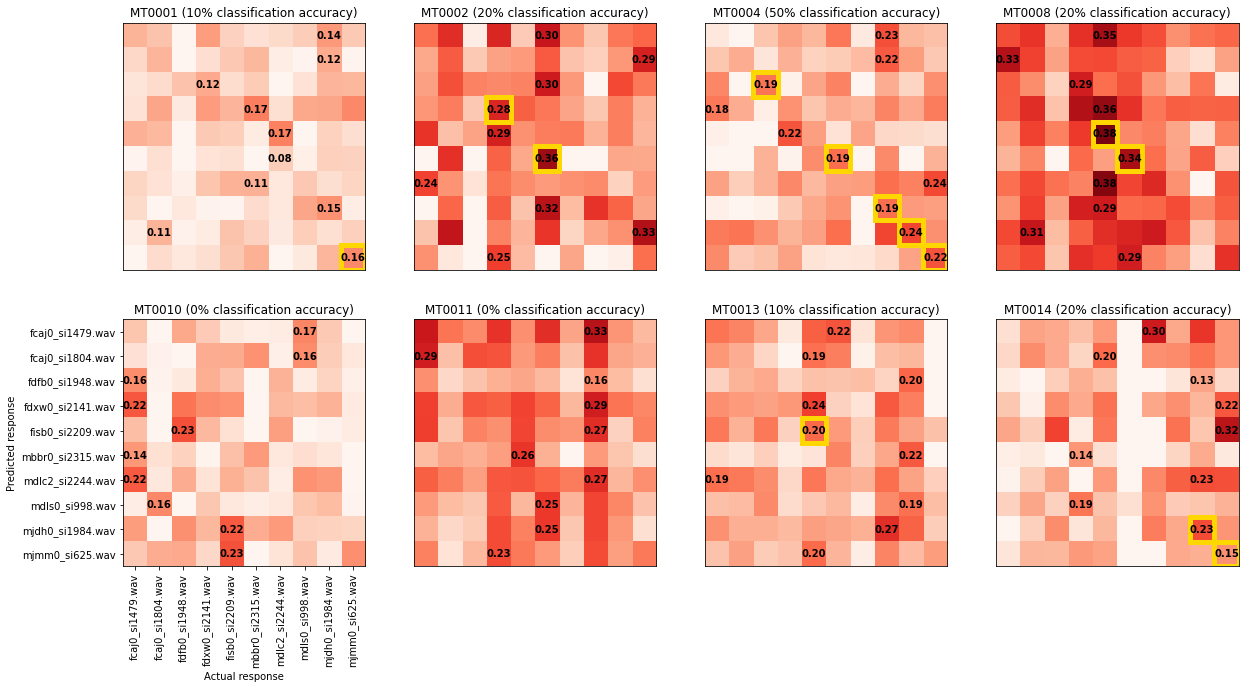

In [32]:
# All weights
# Make 10x10 correlation matrix
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
for subj_idx, subject in enumerate(subject_list):
    correlations = np.zeros((len(test_set),len(test_set)))
    for i,key1 in enumerate(test_set):
        for ii,key2 in enumerate(test_set):
            correlations[i,ii] = predict_response(
                weights[subject], vStim_by_sn[key1], vResp_by_sn[subject][key2])[0].mean()
    # Plot all corrs
    correct_classifications = 0
    plt.subplot(2,4,subj_idx+1)
    plt.imshow(correlations,vmin=0,vmax=.4,aspect='auto',cmap=cm.Reds);
    if subj_idx == 4:
        plt.xlabel("Actual response");
        plt.ylabel("Predicted response");
        plt.gca().set_xticks(np.arange(correlations.shape[0]));
        plt.gca().set_yticks(np.arange(correlations.shape[0]));
        plt.gca().set_xticklabels(test_set,rotation=90);
        plt.gca().set_yticklabels(test_set);
    else:
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
#     if subj_idx == 7:
#         plt.colorbar(location="bottom",shrink=0.5,anchor=(0.5,-0.75));
    for i,row in enumerate(correlations): # get the max
        for ii,item in enumerate(row):
            if item == row.max():
                plt.text(ii,i,"%.2f"%correlations[i,ii],va="center",ha="center",color="black",fontsize="medium",weight="bold")
                if i == ii:
                    rect = plt.Rectangle((i-.5, ii-.5), 1,1, fill=False, color='gold',lw=5)
                    plt.gca().add_patch(rect)
                    correct_classifications += 1
    plt.title(f'{subject} ({int((correct_classifications/len(test_set))*100)}% classification accuracy)')
# plt.tight_layout();
fig.savefig('./figs/all_wts_all_subjects.pdf')

In [59]:
# SIG WTS ONLY STATS
correlations = dict()
max_corrs = []
for subj_idx, subject in enumerate(subject_list):
    correlations[subject] = np.zeros((len(test_set),len(test_set)))
    # Get all correlations
    for i,key1 in enumerate(test_set):
        for ii,key2 in enumerate(test_set):
            correlations[subject][i,ii] = predict_response(
                sig_weights[subject], vStim_by_sn[key1], vResp_by_sn[subject][key2])[0].mean()
    # Get the max correlation
    for i, row in enumerate(correlations[subject]):
        for ii, item in enumerate(row):
            if item == row.max():
#                 print(item)
                max_corrs.append(item)
print(len(max_corrs))
print(np.array(max_corrs).mean())
print(np.array(max_corrs).std())

80
0.10883974683445304
0.07456051805270611


In [60]:
# ALL WTS STATS
correlations = dict()
max_corrs = []
for subj_idx, subject in enumerate(subject_list):
    correlations[subject] = np.zeros((len(test_set),len(test_set)))
    # Get all correlations
    for i,key1 in enumerate(test_set):
        for ii,key2 in enumerate(test_set):
            correlations[subject][i,ii] = predict_response(
                weights[subject], vStim_by_sn[key1], vResp_by_sn[subject][key2])[0].mean()
    # Get the max correlation
    for i, row in enumerate(correlations[subject]):
        for ii, item in enumerate(row):
            if item == row.max():
#                 print(item)
                max_corrs.append(item)
print(len(max_corrs))
print(np.array(max_corrs).mean())
print(np.array(max_corrs).std())

80
0.23085801588814378
0.06909282573303852


0.10308388481405548
0.1274712893935496
0.1274712893935496
0.1274712893935496
0.1274712893935496
0.1274712893935496
0.1274712893935496
0.1274712893935496
0.1274712893935496
0.1274712893935496
0.23896255318515647
0.23896255318515647
0.23896255318515647
0.2513681880204797
0.2513681880204797
0.3072033029961047
0.3072033029961047
0.3072033029961047
0.3072033029961047
0.3072033029961047
0.11152443773868877
0.11358058080931283
0.11358058080931283
0.11358058080931283
0.11358058080931283
0.11358058080931283
0.13089292533993152
0.13089292533993152
0.13662005337472746
0.13662005337472746
0.15693746561126004
0.15693746561126004
0.15693746561126004
0.15693746561126004
0.1677790854407014
0.22533645112093298
0.22533645112093298
0.22533645112093298
0.22533645112093298
0.22533645112093298
0.00442312436728152
0.00442312436728152
0.02921786731581256
0.02921786731581256
0.034508593359043084
0.04811787901122797
0.04811787901122797
0.04811787901122797
0.04811787901122797
0.04811787901122797
0.22200300641461

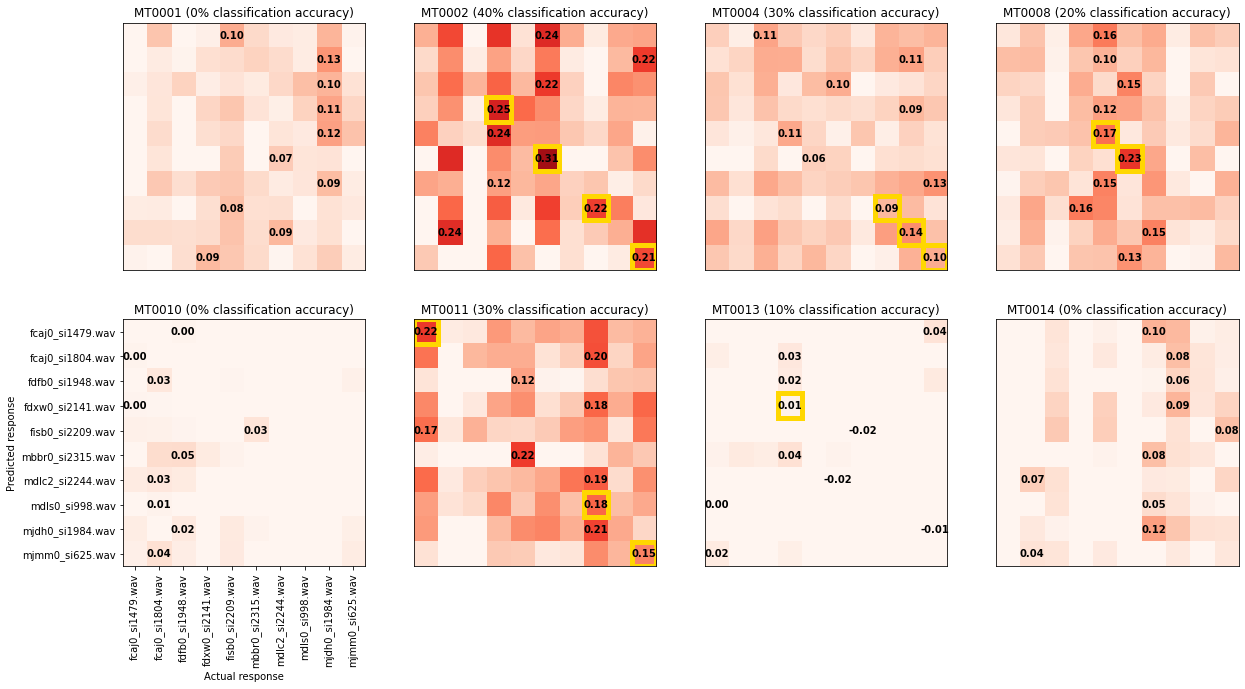

In [53]:
# Significant weights only
# What is the problem with this ??????
# Make 10x10 correlation matrix
correlations_all_subj_max = np.zeros((80,80)) #append all correlations for each subject

fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
for subj_idx, subject in enumerate(subject_list):
    correlations = np.zeros((len(test_set),len(test_set)))

    for i,key1 in enumerate(test_set):
        for ii,key2 in enumerate(test_set):
            correlations[i,ii] = predict_response(
                sig_weights[subject], vStim_by_sn[key1], vResp_by_sn[subject][key2])[0].mean()
        correlations_all_subj_max[]

    # Plot all corrs
    #print(correlations.max())
    
    correct_classifications = 0
    plt.subplot(2,4,subj_idx+1)
    plt.imshow(correlations,vmin=0,vmax=.35,aspect='auto',cmap=cm.Reds);
    if subj_idx == 4:
        plt.xlabel("Actual response");
        plt.ylabel("Predicted response");
        plt.gca().set_xticks(np.arange(correlations.shape[0]));
        plt.gca().set_yticks(np.arange(correlations.shape[0]));
        plt.gca().set_xticklabels(test_set,rotation=90);
        plt.gca().set_yticklabels(test_set);
    else:
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
#     if subj_idx == 7:
#         plt.colorbar(ax=ax,location="bottom",shrink=0.5,anchor=(0.5,-0.75));
    for i,row in enumerate(correlations): # get the max
        for ii,item in enumerate(row):
            if item == row.max():
                plt.text(ii,i,"%.2f"%correlations[i,ii],va="center",ha="center",color="black",fontsize="medium",weight="bold")
                if i == ii:
                    rect = plt.Rectangle((i-.5, ii-.5), 1,1, fill=False, color='gold',lw=5)
                    plt.gca().add_patch(rect)
                    correct_classifications += 1
    plt.title(f'{subject} ({int((correct_classifications/len(test_set))*100)}% classification accuracy)')
# plt.tight_layout();
fig.savefig('./figs/sig_wts_all_subjects.pdf')